In [1]:
# Model CNN untuk persoalan klasifikasi menggunakan dataset CIFAR10
# Urutan proses:
# Step 1 - import Keras: The Python Deep Learning library
# Step 2 - menyiapkan dataset CIFAR10
# Step 3 - Data Preprocessing
# Step 4 - Pembuatan Model CNN
# Step 5 - Kompilasi
# Step 6 - Training Model
# Step 7 - Evaluasi Model

In [2]:
# Step 1 - import Keras: The Python Deep Learning library
# import tensorflow as tf
import keras
keras.__version__

'2.8.0'

In [3]:
# Step 2 - menyiapkan dataset CIFAR10
# Dataset CIFAR10 telah tersedia dalam library keras, sehingga kita bisa mengimpor CIFAR10 dari library keras.
#tf.keras.datasets.cifar10.load_data()
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# Dataset CIFAR10 berisi gambar airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
# Masing-masing gambar berukuran 32 x 32 pixel dengan 3 channel warna (RGB).
# Channel warna dalam CIFAR10 memiliki rentang nilai antara 0 s.d. 255.
# Terdapat 50,000 gambar untuk training dan 10,000 gambar untuk testing dalam dataset tersebut.
def data_summary():
  print("train_images")
  print("shape =", train_images.shape)
  print("max =", train_images.max())
  print("max =", train_images.min())

  print("\ntest_images")
  print("shape =", test_images.shape)
  print("max =", test_images.max())
  print("max =", test_images.min())

  print("\ntrain_labels")
  print("shape =", train_labels.shape)
  print("max =", train_labels.max())
  print("max =", train_labels.min())

  print("\ntest_labels.shape")
  print("shape =", test_labels.shape)
  print("max =", test_labels.max())
  print("max =", test_labels.min())


data_summary()

train_images
shape = (50000, 32, 32, 3)
max = 255
max = 0

test_images
shape = (10000, 32, 32, 3)
max = 255
max = 0

train_labels
shape = (50000, 1)
max = 9
max = 0

test_labels.shape
shape = (10000, 1)
max = 9
max = 0


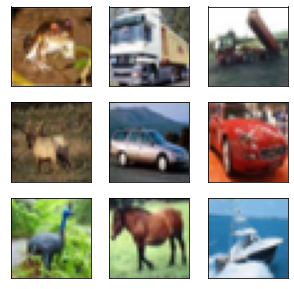

In [5]:
# Visualisasi dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [6]:
# Step 3 - Data Preprocessing
# Agar dataset CIFAR10 dapat diproses menggunakan CNN, maka perlu dilakukan beberapa penyesuaian format data tersebut, yaitu:
# - Melakukan normalisasi dengan cara mengubah range data dari 0-255 menjadi 0-1.
# - Mengubah data berjenis kategori (data label 0-9) menjadi binary class matrix.

# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

data_summary()

train_images
shape = (50000, 32, 32, 3)
max = 1.0
max = 0.0

test_images
shape = (10000, 32, 32, 3)
max = 1.0
max = 0.0

train_labels
shape = (50000, 10)
max = 1.0
max = 0.0

test_labels.shape
shape = (10000, 10)
max = 1.0
max = 0.0


In [7]:
# Step 4 - Pembuatan Model CNN
# Enam layer dalam kode berikut ini adalah model CNN yang paling umum dan mendasar. 
# Model tersebut terdiri dari beberapa layer Conv2D dan MaxPooling2D.
# Convolutional Neural (convets) memerlukan input dalam bentuk (image_height, image_width, image_channels), dimana 
# (jumlah samples tidak termasuk dalam parameter yang diperhitungkan). 
# Itulah sebabnya dituliskan input_shape=(32, 32, 3) saat pembuatan convets layer.
from keras import layers
from keras import models

model = models.Sequential() 
# membuat sebuah Neural Network layer yang sifatnya linier.

model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
# Layer Convolution Pertama
# 32 menandakan jumlah kernel atau filter yang digunakan adalah 32.
# (3, 3) menandakan ukuran kernal atau filter yang digunakan adalah 3 x 3.
# padding='valid' berarti tidak menggunakan padding yang nantinya akan menyebabkan pengurangan ukuran output menjadi 26 x 26.
# input_shape=(32, 32, 3) berarti input layer tersebut adalah 3D tensor(height, width, channels). height = 32, width = 32, dan channels = 3 karena CIFAR10 adalah gambar RGB.
# layer ini akan menghasilkan output dengan dimensi (None, 30, 30, 32) dengan jumlah parameter 896.
# 30 didapatkan dari dimensi input 32 - 2 (dimensi input - padding).
# 32 didapatkan dari jumlah kernel yang digunakan dalam satu layer.
# 896 didapatkan dari ((3 x 3 x 3) + 1) x 32 ((kernel height x kenel weight x image_channels) + bias parameter) x jumlah kenel)
model.add(layers.MaxPooling2D((2, 2)))
# Layer MaxPooling Pertama
# Layer ini akan melakukan "pooling" untuk mencari nilai maksimal dari hasil convolution. 
# Dengan kata lain ini adalah proses downsampling untuk mengurasi dimensi data. 
# MaxPooling akan melakukan scanning gambar dengan dimensi tertentu dan memilih data dengan nilai maksimal.
# Perintah tersebut akan membuat sebuah layer MaxPooling. 
# Parameter (2, 2) akan membuat sebuah kernel berukuran 2 dan kernel tersebut akan bergeser sepanjang 2.
# Layer ini akan menghasilkan output dengan dimensi (None, 15, 15, 32)
# 15 didapatkan dari 30 / 2 (dimensi output layer convolutional pertama / dimensi kernel MaxPooling2D).
# 32 didapatkan dari jumlah kernel dari output layer convolutional pertama.

model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
# Layer Convolution Kedua
# penjelasan sama seperti line coding sebelumnya.
# jumlah kernel atau filter yang digunakan pada layer berikutnya meningkat menjadi 64. 
# Hal ini disebabkan karena setelah melalui layer convolutional pertama, dimensi input data telah dikurangi, sehingga memungkinkan untuk memproses dengan lebih banyak kernel.
# layer ini akan menghasilkan output dengan dimensi (None, 13, 13, 64) dengan jumlah parameter 18496.
# 13 didapatkan dari 15 - 2 (dimensi output layer MaxPooling pertama - padding).
# 64 didapatkan dari jumlah kernel yang digunakan dalam satu layer.
# 18496 didapatkan dari ((3 x 3 x 32) + 1) x 64 ((kernel height x kernel weight x feature map layer MaxPooling pertama) + bias parameter) x jumlah kernel)
model.add(layers.MaxPooling2D((2, 2)))
# Layer MaxPooling Kedua
# penjelasan sama seperti line coding sebelumnya.
# Layer iin akan menghasilkan akan menghasilkan output dengan dimensi (None, 6, 6, 64)
# 6 didapatkan dari 13 / 2 (dimensi output layer convolutional kedua / dimensi kernel MaxPooling2D).
# 64 didapatkan dari jumlah kernel dari output layer convolutional kedua.

model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
# Layer Convolution Ketiga.
# penjelasan sama seperti line coding sebelumnya.
# Layer ini akan menghasilkan output dengan dimensi (None, 4, 4, 64) dengan jumlah parameter 36928.
# 4 didapatkan dari 6 - 2 (dimensi output layer MaxPooling kedua - padding).
# 64 didapatkan dari jumlah kernel yang digunakan dalam satu layer.
# 36928 didapatkan dari ((3 x 3 x 64) + 1) x 64 ((kernel height x kenel weight x feature map layer MaxPooling kedua) + bias parameter) x jumlah kenel)

In [8]:
model.add(layers.Flatten())
# Layer penutup setelah convolutional layer adalah Dense layer (sekali lagi ini adalah model CNN yang sangat umum digunakan). 
# Dense layer ini akan dipergunakan untuk melakukan klasifikasi dari hasil proses convolutional yang telah dilakukan.
# Karena Dense layer hanya memerlukan data 1D, maka harus dilakukan penambahan satu layer untuk melakukan transformasi data tersebut dengan perintah seperti di atas.
# Layer ini akan mengubah dimensi layer sebelumnya dari (None, 4, 4, 64) menjadi (None, 1024).
# 1024 didapatkan dari 4 x 4 x 64 (kernel height x kenel weight x feature map layer convolutional ketiga).
# Diikuti dengan dua Dense layer dengan parameter berikut:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Dense layer pertama akan mengurangi dimensi feature map dari 1024 menjadi 64. 
# Sedangkan Dense layer kedua akan mengurangi dimensi feature map dari 64 menjadi 10 sesuai dengan klasifikasi kelas yang diinginkan.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Step 5 - Kompilasi
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# optimizer='rmsprop' menandakan jenis optimizer yang digunakan adalah rmsprop.
# loss='categorical_crossentropy' menandakan jenis loss yang digunakan adalah categorical_crossentropy.
# metrics=['accuracy'] menandakan jenis metrics yang digunakan adalah accuracy.

In [10]:
# Step 6 - Training Model
model.fit(train_images, train_labels, epochs=5, batch_size=64)
# epochs='5' menandakan training akan dilakukan sebanyak 5 kali.
# batch_size='64' menandakan jumlah sample tiap gradient update.
# Output: Stop training ketika metrik yang dimonitor telah berhenti mengalami peningkatan.
# keras.callbacks.History --> Ini bukan error. model.fit mengembalikan history object, sebagaimana yang ditampilkan. 
# Output dari model.fit bisa diassign ke variabel, dan kemudian dilanjut dengan pemakaian history object tersebut. 
# Menyimpan value seperti loss pada setiap epoch.

Epoch 1/5
782/782 [==============================] - 6s 3ms/step - loss: 1.6395 - accuracy: 0.4081
Epoch 2/5
782/782 [==============================] - 2s 3ms/step - loss: 1.2544 - accuracy: 0.5571
Epoch 3/5
782/782 [==============================] - 2s 3ms/step - loss: 1.0793 - accuracy: 0.6230
Epoch 4/5
782/782 [==============================] - 2s 3ms/step - loss: 0.9612 - accuracy: 0.6645
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.8704 - accuracy: 0.6942


In [11]:
# Step 7 - Evaluasi Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc =', test_acc)
print('test_loss =', test_loss)
# Hasil evaluasi menunjukkan bahwa CNN model yang dibuat memiliki akurasi sebesar 0.579 dan loss sebesar 1.175.

313/313 [==============================] - 1s 2ms/step - loss: 1.2055 - accuracy: 0.5943
test_acc = 0.5942999720573425
test_loss = 1.205461025238037
